In [1]:
import pandas as pd
import numpy as np
from scipy import stats


import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

In [2]:
path = r'./dataFolders/Output/Step6_v4/'
outpath = r'./dataFolders/Output/Step6_v4/Figure/'

In [3]:
data_df = pd.read_csv(path + 'AllLight_EveryMoth_notOutliers_withBins.csv')
data_df.head()

,Unnamed: 0,In_Frame,Out_Frame,Proboscis,DiscoveryTime,trialNum,name,zscore,outlier_ID,condition,...,"(5,15)","(10,20)","(15,25)","(20,30)",lightLevel,early,late,early3,late10_high,late10_low
0,0,45940,53025,46222.0,2.82,0,L0.1_c-3_m20,0.251222,False,Low,...,False,False,False,False,L0.1,True,False,True,NaN,False
1,1,55058,60805,55341.0,2.83,1,L0.1_c-3_m20,0.249691,False,Low,...,False,False,False,False,L0.1,True,False,True,NaN,False
2,2,67612,69165,67744.0,1.32,2,L0.1_c-3_m20,0.480929,False,Low,...,False,False,False,False,L0.1,True,False,True,NaN,False
3,3,72461,74177,72606.0,1.45,3,L0.1_c-3_m20,0.461021,False,Low,...,False,False,False,False,L0.1,True,False,False,NaN,False
4,4,77368,79850,77499.0,1.31,4,L0.1_c-3_m20,0.482460,False,Low,...,False,False,False,False,L0.1,True,False,False,NaN,False


Text(0.5, 0, 'Occurance')

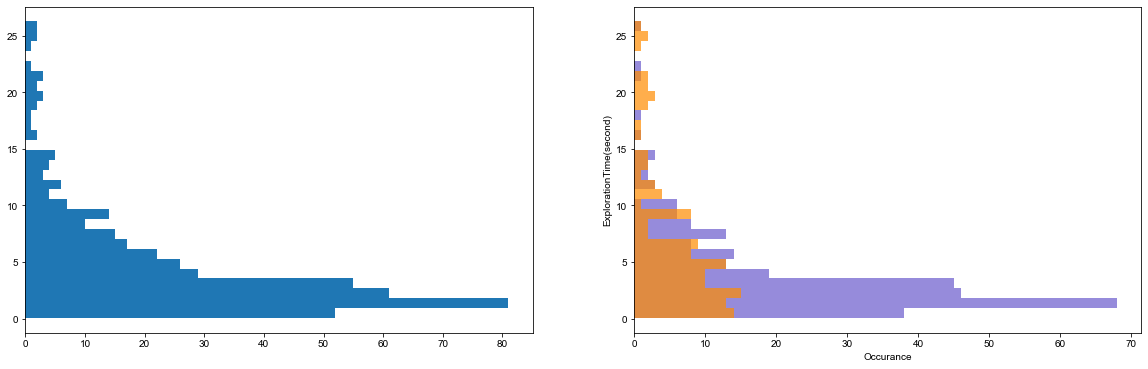

In [7]:
hist, bins = np.histogram(data_df.DiscoveryTime.values, bins = 30)

fig, ax = plt.subplots(1,2, figsize = (20,6))
ax = ax.ravel()

ax[0].hist(data_df.DiscoveryTime.values, bins, histtype = 'bar', orientation='horizontal')
ax[1].hist(data_df.loc[data_df.lightLevel == 'L0.1', 'DiscoveryTime'].values, bins, 
          orientation='horizontal', alpha = 0.7, color = 'slateblue')
ax[1].hist(data_df.loc[data_df.lightLevel == 'L50', 'DiscoveryTime'].values, bins, 
          orientation='horizontal', alpha = 0.7, color = 'darkorange')
ax[1].set_ylabel('ExplorationTime(second)')
ax[1].set_xlabel('Occurance')

## plot and so stats for sliding window

In [8]:
# get the pdes and sample sizes

low_pde_df = pd.read_csv('./dataFolders/Output/Step6_v4/L0.1_pde.csv')
high_pde_df = pd.read_csv('./dataFolders/Output/Step6_v4/L50_pde.csv')
sample_size = pd.read_csv('./dataFolders/Output/Step6_v4/samplesize.csv')
sample_size.index = sample_size['Unnamed: 0']

In [9]:
bin_center = np.linspace(0,40,100)
delta = np.diff(bin_center)[0]

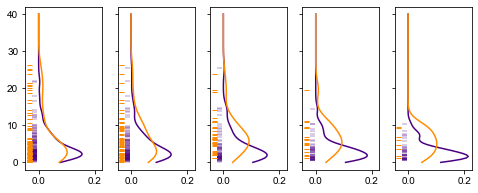

In [10]:
w = 8
h = 3
f, ax = plt.subplots(1,5, figsize = (w,h),
                    sharex = True,
                    sharey = True)
ax = ax.ravel()

label = ['(0,10)', '(5,15)', '(10,20)', '(15,25)', '(20,30)']
color = ['indigo', 'darkorange']
mec = ['midnightblue', 'darkred']

i = 0
for bin_label in label:
    l_low_value = low_pde_df[bin_label]
    l_low_data = data_df.loc[(data_df[bin_label] == True) & (data_df['lightLevel'] == 'L0.1'),
                             'DiscoveryTime'].values
    
    l_high_value = high_pde_df[bin_label]
    l_high_data = data_df.loc[(data_df[bin_label] == True) & (data_df['lightLevel'] == 'L50'),
                             'DiscoveryTime'].values
    
    ax[i].plot(l_low_value, bin_center, color = color[0])
    ax[i].plot(l_high_value, bin_center, color = color[1])
    
    ax[i].plot([-0.015]*len(l_low_data), l_low_data,
               '_',
               ms = 5,
#                color = color[0], 
               mec = color[0],
               mew = 0.4
              )
    ax[i].plot([-0.035]*len(l_high_data), l_high_data,
               '_',
               ms = 5,
               mec = color[1],
              )
    i+=1  

In [11]:
# edit the axis

for axis in ax:
    axis.set_ylim([-1, 30])
    axis.set_xlim([-0.05, 0.25])
    
for bin_label, axis in zip(label, ax):
    N_low = sample_size.loc[bin_label, 'L0.1']
    N_high = sample_size.loc[bin_label, 'L50']
    axis.text(0.09, 17, 'n =' + str(N_low), color = 'indigo',
             weight = 'bold', size = 7)
    axis.text(0.09, 14, 'n =' + str(N_high), color = 'orangered',
             weight = 'bold', size = 7)

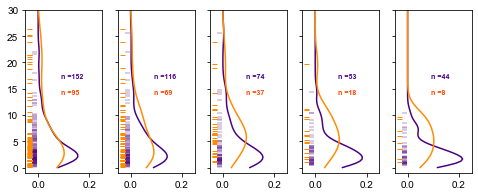

In [12]:
f

In [13]:
f.savefig('./dataFolders/Output/Step6_v4/Figure/slidingWindow_learningCurves.pdf',
         bbox_inches = 'tight')

### do the stats on these groups
### for sliding window

In [14]:
stats_df = pd.DataFrame(index = label, columns = ['mannWhitney', 'ks'])

treatment = ['L0.1', 'L50']
for bin_label in label:
    d1 = data_df.loc[(data_df['lightLevel'] == 'L0.1') & (data_df[bin_label] == True)
                     ,'DiscoveryTime'].values
    d2 = data_df.loc[(data_df['lightLevel'] == 'L50') & (data_df[bin_label] == True)
                     ,'DiscoveryTime'].values
    _,Mp = stats.mannwhitneyu(d1, d2)
    stats_df.loc[bin_label, 'mannWhitney'] = Mp
    _,ks = stats.ks_2samp(d1, d2)
    stats_df.loc[bin_label, 'ks'] = ks

In [15]:
stats_df

,mannWhitney,ks
"(0,10)",0.109323,0.186663
"(5,15)",0.00911944,0.0520464
"(10,20)",8.04282e-06,1.01849e-05
"(15,25)",0.000301688,0.000416948
"(20,30)",0.0160479,0.0656067


In [16]:
stats_df.to_csv('./dataFolders/Output/Step6_v4/slidingWindow_stats.csv')

### do the stats on these groups
### for early-late

In [17]:
data_df = pd.read_csv('./dataFolders/Output/Step6_v4/AllLight_EveryMoth_notOutliers_withBins.csv')
earlyLateStats_df = pd.DataFrame(index = ['L0.1', 'L50'], columns = ['mannWhitney', 'ks'])

for l in ['L0.1', 'L50']:
    d1 = data_df.loc[(data_df['lightLevel'] == l) & (data_df['early'] == True)
                     ,'DiscoveryTime'].values
    d2 = data_df.loc[(data_df['lightLevel'] == l) & (data_df['late'] == True)
                     ,'DiscoveryTime'].values
    
    _,Mp = stats.mannwhitneyu(d1, d2)
    earlyLateStats_df.loc[l, 'mannWhitney'] = Mp
    _,ks = stats.ks_2samp(d1, d2)
    earlyLateStats_df.loc[l, 'ks'] = ks

In [18]:
earlyLateStats_df

,mannWhitney,ks
L0.1,0.0304354,0.100735
L50,0.0956147,0.113592


## for first-last

In [23]:
data_df = pd.read_csv('./dataFolders/Output/Step6_v4/AllLight_EveryMoth_notOutliers_withBins.csv')
firstLastStats_df = pd.DataFrame(index = ['L0.1', 'L50'], columns = ['mannWhitney', 'ks'])

for l, bl in zip(['L0.1', 'L50'], ['late10_low', 'late10_high']):
    d1 = data_df.loc[(data_df['lightLevel'] == l) & (data_df['early3'] == True)
                     ,'DiscoveryTime'].values
    d2 = data_df.loc[(data_df['lightLevel'] == l) & (data_df[bl] == True)
                     ,'DiscoveryTime'].values
    
    _,Mp = stats.mannwhitneyu(d1, d2)
    firstLastStats_df.loc[l, 'mannWhitney'] = Mp
    _,ks = stats.ks_2samp(d1, d2)
    firstLastStats_df.loc[l, 'ks'] = ks

In [24]:
firstLastStats_df

,mannWhitney,ks
L0.1,0.00168731,0.0371622
L50,0.0637008,0.147849
